# Neural Networks Coursework
***

## Developing a Deep Learning (NN) model to predict Parkinson's Disease in early stages using speech features.

Parkinson's Disease (PD) diagnosis using Machine Learning techniques has been studied very thoroughly in the recent years using either classical Machine Leraning models like Suppor Vector Machines or Random Forest. Moreover, some studies have shown that using Deep Learning models can be yield very promosing results. 

Therefore, this project consists on the development of a Neural Network to predict, given subject speech features, if the given subject suffers from PD. 

The dataset used can be found in [kaggle](https://www.kaggle.com/dipayanbiswas/parkinsons-disease-speech-signal-features), but is provided here as a `.csv` file.


*As far as it is possible, my own code and methods will be used.*

## Defining the problem

### Input data

Data comes from a `.csv` file, that will be loaded using `pandas` into a `DataFrame`, and a preliminar data exploration analysis will be carried out to show the structure of input data. 

### Problem type and output

Since the goal of the model will be to assess wether a subject suffers or not from PD, the problem is a binary classification problem (either the user has or has not PD).

This already tells us that our model's last layer (output) will have one single neuron, which will be the desired output. 

## Measure of success

As with all binary classification problems, one of the most important metrics of the model is the `accuracy`, this is the number of correct predictions over the number of total predictions. If when exploring the data we find that the data samples are skewed, and there is an inbalance between patients with PD and patients without PD, the `accuracy` metric will be subsituted by the `precision`, `recall` or`f1` score, with takes into account `precision` and `recall` as well as `accuracy`.


### Data engineering

Before building our model, first we have to adapt the input data into a tensor format, so the Neural Network know how to handle the data. This data will have to be normalized if the values of the different features have different ranges

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install tensorflow

from pathlib import Path
import numpy as np
import pandas as pd

files_path = Path('./data')

def load_data(csv_name: str):
    df = pd.read_csv(files_path.joinpath(csv_name))
    return df
    
df = load_data('pd_speech_features.csv')
print(f"Columns: {len(df.columns)}")
print(f"Nan values: {df.isnull().values.any()}")
df.describe()

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 12.7 MB 4.0 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.
ERROR: You must give at least one requirement to install (see "pip help install")
Note: you may need to restart the kernel to use updated packages.
Columns: 755
Nan values: False


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


We can see from this first summary of the data that the number of features is 753, this is: 755 columns of the dataframe, but extracting the `id` and the last column which is the `class` (label). Thefeore, the dimensionality of our model is 753 for the input layer. This could be reduced with PCA or another dimensionality reduction algorithm to extract the most relevant features. 

Since we are working with Neural Networks, we can reduce the dimensionality by reducing the number of neurons in the subsequent layers, and see how this impacts the performance of the model. 

It can be seen as well how different features take values that are in very different ranges. For exmaple, `RPDE` has a mean of 0.48, and `numPeriodsPulses` has a mean of 322.67. This can lead to bad model results because it will tend to weight in favor of those features with the highest values. Therefore, a normalizaation of the dataset is needed in order to feed it to the model.

The total number of samples if 756, which will be enough to split the data into train[validation]-test sub-samples.

We can proceed by dropping the `id` column that will not be useful for the model. And then a normalization of the columns.

In [2]:
# Drop id column
df.drop(['id'], axis=1, inplace=True)

The method developed below takes as input the dataframe to be normalized, as well as the label column, that doesn't need normalization (doesn't need one_hot encoding either) because it is a binary problem and label is already encoded as `[0,1]`

In [3]:
# Normalize dataframe
from typing import Tuple

def normalize_columns_split_label(df: pd.DataFrame, label_col: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Normalize all columns of the dataframe, except for the label column (which doesn't need
    normalization)
    Then return data and labels separately.
    """
    df = df.copy()
    for col in df.columns:
        if col != label_col:
            df[col] = (df[col]-df[col].mean())/df[col].std()
    labels = df[label_col]
    df.drop(label_col, axis=1, inplace=True)
    return df.to_numpy(), labels.to_numpy()

data, labels = normalize_columns_split_label(df, 'class')

print(data.shape)
pd.DataFrame(data=data).describe()


(756, 753)


,0,1,2,3,4,5,6,7,8,9,...,743,744,745,746,747,748,749,750,751,752
count,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,...,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02
mean,-1.879743e-16,9.210739e-16,-1.400408e-15,-9.398713e-18,-7.518971e-17,-1.691768e-16,-1.315820e-16,2.349678e-17,2.819614e-17,-9.398713e-17,...,3.759485e-17,-2.114711e-17,-5.169292e-17,7.518971e-17,5.874196e-17,-2.349678e-17,-7.988906e-17,2.819614e-17,-7.518971e-17,-9.868649e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.031583e+00,-4.162788e+00,-2.250693e+00,-2.435620e+00,-3.245064e+00,-3.236122e+00,-2.328543e+00,-5.117027e-01,-8.045759e-01,-7.007410e-01,...,-4.502459e-01,-5.856714e-01,-6.531090e-01,-6.658840e-01,-6.048488e-01,-5.864633e-01,-6.576218e-01,-8.228671e-01,-8.865570e-01,-8.506067e-01
25%,-1.031583e+00,9.774902e-02,-7.653893e-01,-7.459128e-01,-7.354658e-01,-7.311544e-01,-7.430617e-01,-4.587926e-01,-5.153827e-01,-5.010148e-01,...,-4.394457e-01,-5.643814e-01,-5.942273e-01,-5.964986e-01,-5.384891e-01,-5.219363e-01,-5.667084e-01,-7.081128e-01,-7.628559e-01,-8.043109e-01
50%,9.681013e-01,3.743248e-01,1.592962e-03,-3.421508e-02,-7.027100e-02,-6.718716e-02,-1.706333e-01,-4.209997e-01,-3.156112e-01,-3.145628e-01,...,-4.106194e-01,-4.891192e-01,-4.835825e-01,-4.898876e-01,-4.540135e-01,-4.452689e-01,-4.671424e-01,-5.135016e-01,-5.139139e-01,-6.089178e-01
75%,9.681013e-01,5.199889e-01,7.827394e-01,7.090777e-01,6.075222e-01,6.093552e-01,6.393980e-01,-2.907037e-01,7.441909e-02,6.947578e-02,...,-2.034929e-01,6.444291e-02,2.142590e-01,1.314211e-01,-3.412235e-02,-7.550775e-02,-1.064822e-02,4.530335e-01,5.365224e-01,8.660051e-01
max,9.681013e-01,9.532304e-01,2.183453e+00,2.780599e+00,5.876167e+00,5.858217e+00,3.616665e+00,4.259739e+00,9.674871e+00,1.046865e+01,...,7.651276e+00,5.057983e+00,5.531429e+00,4.031528e+00,4.406607e+00,4.124732e+00,3.742389e+00,3.002580e+00,2.964928e+00,3.649985e+00


## Mesaure of success
Now we can study the distribution of positive and negative patients in order to choose the measure of success of the model, as commented previously. Usually the `accuracy` is a good enough metric, but if the data is skewed, it might not indicate that the model is performing well, but instead just classifying the points by assigning them the most common label.

In [4]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([192, 564]))

Clearly, the data is not distributed equally in both labels, since the patients diagnosed positvely form the 74% of the total patients. Thus, the `accuracy` metric will not be very useful, since a model trained to always classify the patients as positive, will have an accuracy of 0.74. We need to choose some other metrics as well to properly train the model. In this case, the two metrics: `accuracy`, `precision` are chosen, since they are widely used for binary classifications and wroking with True Positive, True Negatives, False Positives and False Negatives.

It can be seen now that the mean of every column is 0, while the standard deviation is 1, so our dataset is normalized. The shape of the dataset is (756, 753) with 756 being the number of samples and 753 the number of features. Hence the input data of the NN will have the form `input_data=(753,)`. 

The next thing to do is to split the data into test and train subgroups. For this, a self-implemented method is used which uses random permutations to split the test using random indexes for the numpy arrays.

In [5]:
import math
np.random.seed(200)

def split_test_train(X: np.ndarray, y: np.ndarray, test_size: float=0.2) -> Tuple[Tuple[np.ndarray, np.ndarray], Tuple[np.ndarray, np.ndarray]]:
    """
    Split a given array X, and its corresponding labels y into a train-test
    data and labels.
    """
    L = list(range(X.shape[0]))
    indices = np.random.permutation(L)
    length = len(L)

    # Compute the length of the test and train splits
    test = math.floor(test_size*length)
    train = length - test
    
    # Split
    testIndexes = indices[0:test]
    complementaryIndexes = indices[-train:]

    X_train = X[complementaryIndexes]
    y_train = y[complementaryIndexes]
    X_test = X[testIndexes]
    y_test = y[testIndexes]
        
       
    return (X_train, y_train), (X_test, y_test)

(train_data, train_labels), (test_data, test_labels) = split_test_train(data, labels)
print(f"Train data: shape = {train_data.shape}, labels={train_labels.shape}")
print(f"Test data: shape = {test_data.shape}, labels={test_labels.shape}")
print(f"Train labels counts: {np.unique(train_labels, return_counts=True)}")
print(f"Test labels counts: {np.unique(test_labels, return_counts=True)}")

Train data: shape = (605, 753), labels=(605,)
Test data: shape = (151, 753), labels=(151,)
Train labels counts: (array([0, 1]), array([159, 446]))
Test labels counts: (array([0, 1]), array([ 33, 118]))


Since we don't have enough data, we can't hold a `validation` set apart, and we have to perform k-fold validation. 

For the last layer, a `sigmoid` function is chosen as the activation function, since it is widely used for binary classification problems. `Binary Crossentoropy` is chosen as a loss function, since it is widely used for binary classificaiton problems as well. 

Three main methods are developed here. One is the `build_model` method which builds the model, the `k_fold_validation` iterates over the train data and performs k-fold validation and the `show_results` which shows the results by decomposing the values of `history.history` dictionary, and taking the last epoch of all, where the model has the weights updated accordingly. 

In [6]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import History
from tensorflow.keras.metrics import BinaryAccuracy, Precision
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

(partial_train_data, partial_train_labels), (val_data, val_labels) = split_test_train(train_data, train_labels)

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, input_shape=(partial_train_data.shape[1],), activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[Precision(), BinaryAccuracy()])
    return model

k = 4
num_epochs = 100

def show_results(history: History):
    for k, v in history.history.items():
        print(f"{k} : {v[-1]}")

def k_fold_validation(folds: int, epochs: int, train_data: np.ndarray, train_labels: np.ndarray, model: Model):
    num_val_samples = len(train_data) // 4
    all_scores = list()
    for i in range(folds):
        print(f'Fold {i} of {folds}')
        # Prepare the validation data: data from partition i
        a, b = i * num_val_samples, (i + 1) * num_val_samples
        val_data = train_data[a : b]
        val_targets = train_labels[a : b]
        
        partial_train_data = np.concatenate([
            train_data[:i*num_val_samples],
            train_data[(i+1)*num_val_samples:]],
            axis=0
        )
        partial_train_targets= np.concatenate([
            train_labels[:i*num_val_samples],
            train_labels[(i+1)*num_val_samples:]],
            axis=0
        )
        history: History = model.fit(partial_train_data, partial_train_targets, 
                                     batch_size=1, 
                                     verbose=0, 
                                     epochs=epochs, 
                                     validation_data=(val_data, val_targets)
                                     )
        show_results(history)
        all_scores.append(history.history)
    return history

history = k_fold_validation(k, num_epochs, train_data, train_labels, build_model())


Fold 0 of 4


2022-01-02 20:19:16.727308: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


loss : 5.054821561323308e-10
precision : 1.0
binary_accuracy : 1.0
val_loss : 2.9332964420318604
val_precision : 0.9067796468734741
val_binary_accuracy : 0.887417197227478
Fold 1 of 4
loss : 1.984023917378508e-10
precision : 1.0
binary_accuracy : 1.0
val_loss : 0.9336085319519043
val_precision : 0.9818181991577148
val_binary_accuracy : 0.9735099077224731
Fold 2 of 4
loss : 9.466027267590604e-11
precision : 1.0
binary_accuracy : 1.0
val_loss : 0.36739540100097656
val_precision : 0.9907407164573669
val_binary_accuracy : 0.9933775067329407
Fold 3 of 4
loss : 7.839145999000152e-11
precision : 1.0
binary_accuracy : 1.0
val_loss : 0.33253636956214905
val_precision : 1.0
val_binary_accuracy : 0.9867549538612366


As we can see, our model performed really well with the training data and the validation set. Actually, it performed perfectly. This is very common, and means that the model is `overfitting`, and is very good at predicting already seen data, but loses capacity with unseen data. 

What we have to do now is to regularize the model so that it does not overfit the already seen data and is better at predicting unseen data. This can be done in several ways:
* Adding Dropout rate for some layers
* Reducing the number of neurons of hidden layers
* Add L1 or L2 regularization

Let's start by assesing if the number of epochs chosen is a good one or we could reduce it and still do not penalize the model.


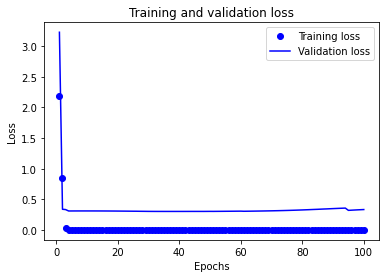

In [7]:
import matplotlib.pyplot as plt 

def plot_loss(history: History):
    plt.clf()
    history_dict = history.history
    history_dict.keys()
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label="Training loss")
    plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

plot_loss(history)


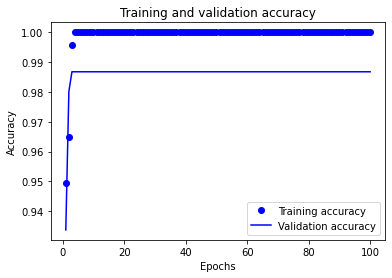

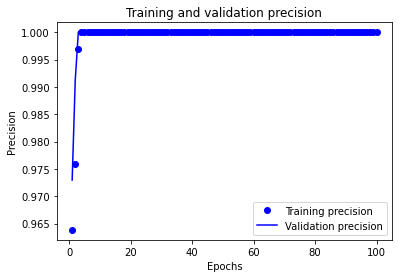

In [8]:
def plot_accuracy(history: History):
    plt.clf()
    history_dict = history.history
    acc_values = history_dict["binary_accuracy"]
    val_acc_values = history_dict["val_binary_accuracy"]
    epochs = range(1, len(acc_values) + 1)
    plt.plot(epochs, acc_values, 'bo', label="Training accuracy")
    plt.plot(epochs, val_acc_values, 'b', label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

def plot_metric(history: History, metric: str):

    keys = history.history.keys()
    final_key = ""
    final_val_key = ""
    for key in keys: 
        if metric in key and 'val' not in key:
            final_key = key
        elif metric in key and 'val' in key:
            final_val_key = key

    plt.clf()
    history_dict = history.history
    values = history_dict[final_key]
    val_values = history_dict[final_val_key]
    epochs = range(1, len(values) + 1)
    plt.plot(epochs, values, 'bo', label=f"Training {metric}")
    plt.plot(epochs, val_values, 'b', label=f"Validation {metric}")
    plt.title(f"Training and validation {metric}")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

plot_accuracy(history)
plot_metric(history, 'precision')

We can see how, after 40 epochs the change in the metrics is not significant, so we can reduce the number of epochs to 20, and the model will not underperform. 

In [9]:
num_epochs = 40
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, input_shape=(partial_train_data.shape[1],), activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[Precision(), BinaryAccuracy()])
    return model

model = build_model()
history = k_fold_validation(k, num_epochs, train_data, train_labels, model)

Fold 0 of 4
loss : 0.0002802855451591313
precision_1 : 1.0
binary_accuracy : 1.0
val_loss : 2.6565306186676025
val_precision_1 : 0.9152542352676392
val_binary_accuracy : 0.9006622433662415
Fold 1 of 4
loss : 0.008833537809550762
precision_1 : 0.997032642364502
binary_accuracy : 0.9977973699569702
val_loss : 0.43052804470062256
val_precision_1 : 0.9818181991577148
val_binary_accuracy : 0.9735099077224731
Fold 2 of 4
loss : 7.171344629242071e-10
precision_1 : 1.0
binary_accuracy : 1.0
val_loss : 6.140007462818176e-05
val_precision_1 : 1.0
val_binary_accuracy : 1.0
Fold 3 of 4
loss : 5.240794777316982e-13
precision_1 : 1.0
binary_accuracy : 1.0
val_loss : 0.6988310217857361
val_precision_1 : 1.0
val_binary_accuracy : 0.9933775067329407


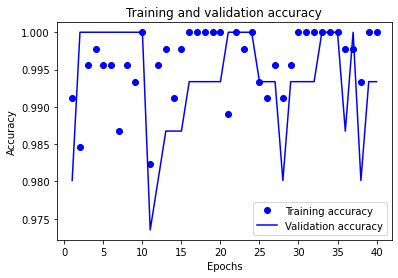

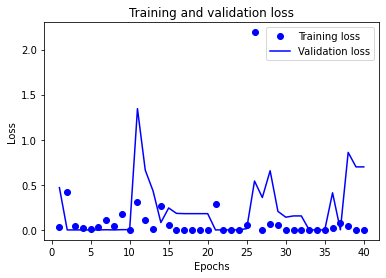

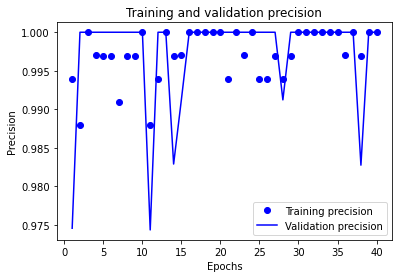

In [10]:
plot_accuracy(history)
plot_loss(history)
plot_metric(history, 'precision')

We can see now how the model performed a bit better in the validation data than in the last iteration, this is due to the fact that we are making it overfit less. Now, let's add some regularization to the first layer, and dropout to the second layer.

In [11]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, input_shape=(partial_train_data.shape[1],), activation='relu', kernel_regularizer='l1'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[Precision(), BinaryAccuracy()])
    return model

model = build_model()

history = k_fold_validation(k,  num_epochs, train_data, train_labels, model)

Fold 0 of 4
loss : 1.1836251020431519
precision_2 : 0.9121813178062439
binary_accuracy : 0.907489001750946
val_loss : 1.2856040000915527
val_precision_2 : 0.8974359035491943
val_binary_accuracy : 0.8675496578216553
Fold 1 of 4
loss : 1.0910261869430542
precision_2 : 0.9050279259681702
binary_accuracy : 0.8986784219741821
val_loss : 1.2384812831878662
val_precision_2 : 0.9150943160057068
val_binary_accuracy : 0.8543046116828918
Fold 2 of 4
loss : 1.0542110204696655
precision_2 : 0.9263455867767334
binary_accuracy : 0.91629958152771
val_loss : 1.372309684753418
val_precision_2 : 0.8455284833908081
val_binary_accuracy : 0.8543046116828918
Fold 3 of 4
loss : 1.0348085165023804
precision_2 : 0.9211267828941345
binary_accuracy : 0.9295154213905334
val_loss : 1.1282461881637573
val_precision_2 : 0.8790322542190552
val_binary_accuracy : 0.860927164554596


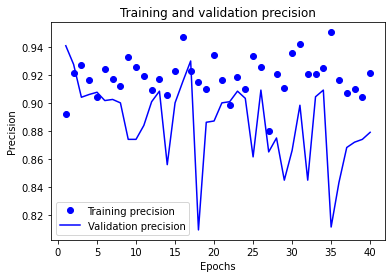

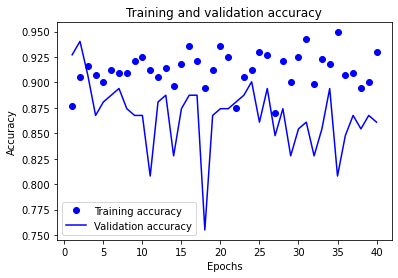

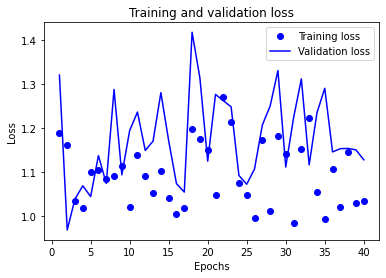

In [12]:
plot_metric(history, 'precision')
plot_accuracy(history)
plot_loss(history)

We can see now how the model is not 100% correct on the train data, this is because of the regularization we just introduced. The model doesn't overfit anymore on the train data, and the validation results are better than in the last iteration.

We can now test the model against the test data and see its performance. 

In [13]:
evaluation = model.evaluate(test_data, test_labels, return_dict=True)
evaluation

5/5 [==============================] - 0s 2ms/step - loss: 1.0533 - precision_2: 0.9492 - binary_accuracy: 0.9205


{'loss': 1.0533086061477661,
 'precision_2': 0.9491525292396545,
 'binary_accuracy': 0.9205297827720642}

## Results

We can see how the model performed very well with the test data, achieving a precision of 0.95 and an accuracy of 0.93. We can conclude that the model has been trained and adapted successfully and that the regularization process has been useful in order to prevent the model from overfitting. When evaluating the model with the test data, very good results have been obtained, even improving those of the train data. We can see how many parameters the model has, and how it has ended up regarding final configuration.

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               386048    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 649,217
Trainable params: 649,217
Non-trainable params: 0
_________________________________________________________________


The total number of parameters is 649217, all of which are trainable since we didn't add any 'frozen' parameters. The total number of layers is 5, although 2 of these are only Dropout layers that carry no parameters, but only have implications on the precious layer. 

Concluding, the model has performed very well with unseen data, as well as with already seen data, what we were looking for since the beginning. 